In [52]:
import torch
import torch.nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.getcwd() + '/src/')
from scaling_layer import ScalingLayer

In [66]:
x = torch.randn(1, 80, 768)

In [67]:
scale = ScalingLayer(768, 512, 2048, return_attn=True)

In [68]:
_, attn = scale(x)

In [69]:
attn.size()

torch.Size([1, 8, 80, 80])

In [70]:
attn = torch.sum(attn, dim=1) / 8

In [71]:
attn.size()

torch.Size([1, 80, 80])

In [72]:
attn = attn[0].detach().numpy()

In [73]:
y_label = ["I"] * 80
x_label = ["I"] * 80

In [74]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 200

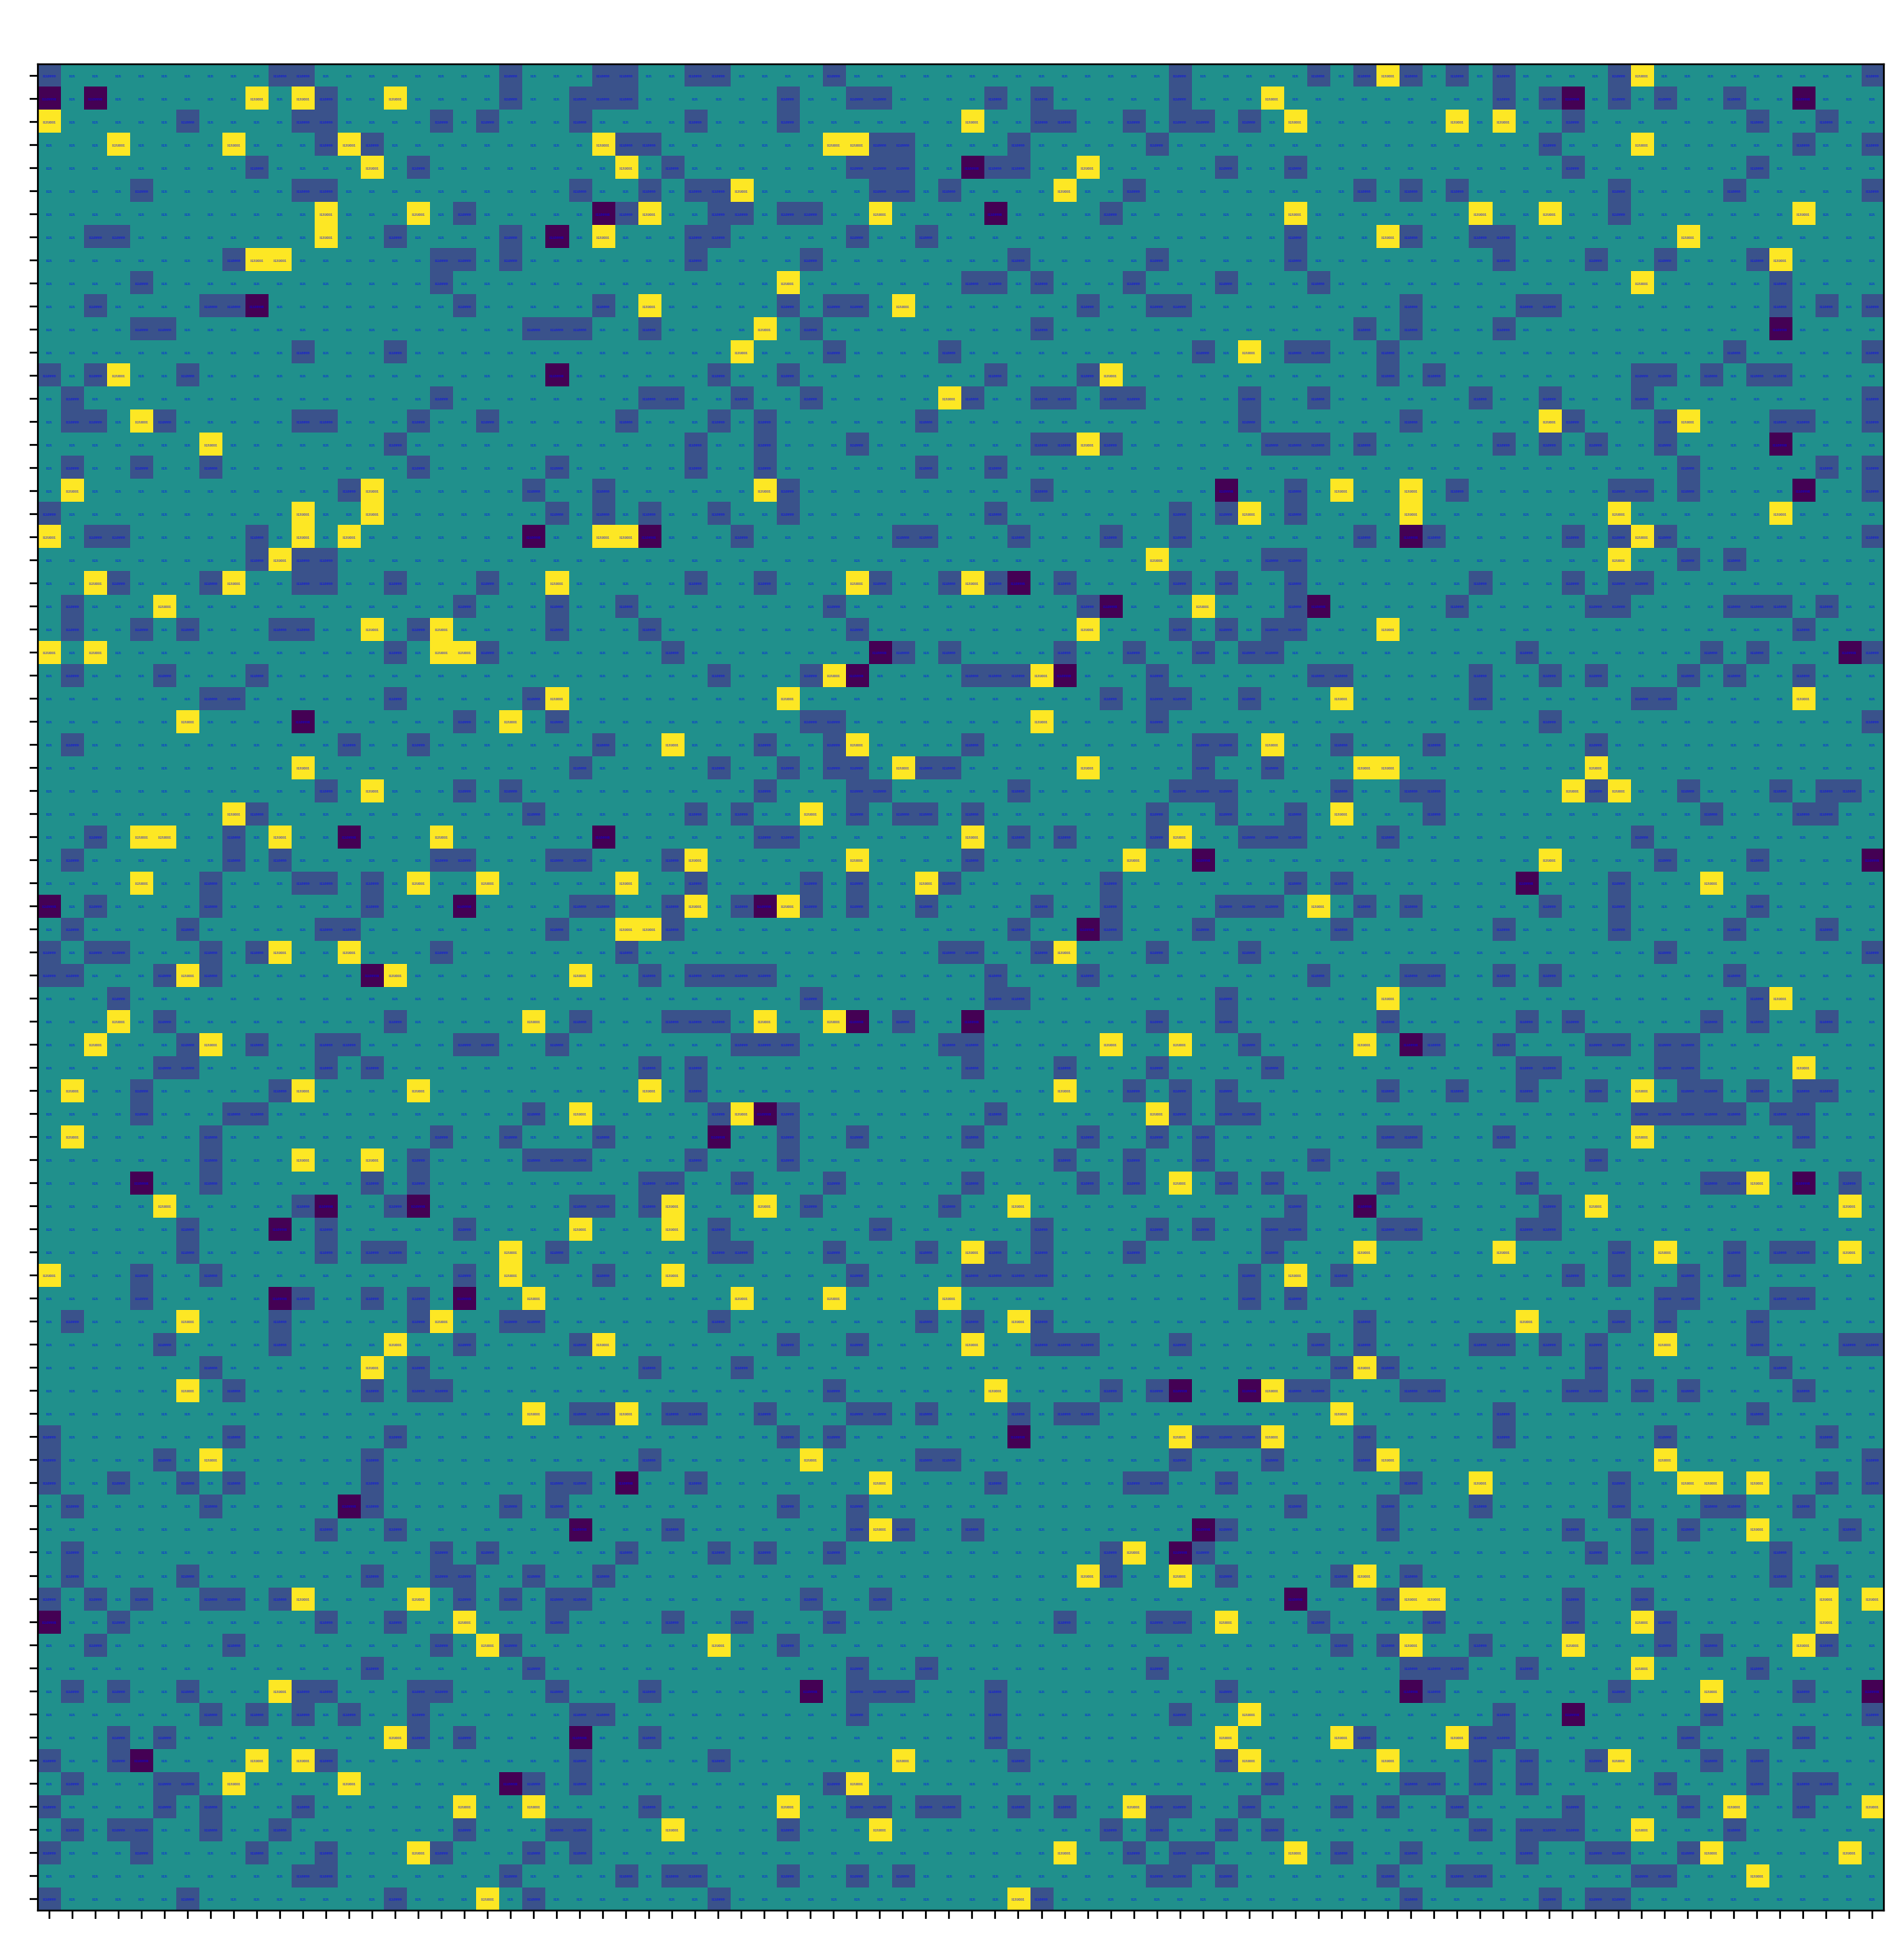

In [76]:
fig, ax = plt.subplots()
im = ax.imshow(attn)

# We want to show all ticks...
ax.set_xticks(np.arange(len(x_label)))
ax.set_yticks(np.arange(len(y_label)))
# ... and label them with the respective list entries
ax.set_xticklabels(x_label, fontsize=8, color="w")
ax.set_yticklabels(y_label, fontsize=8, color="w")

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(y_label)):
    for j in range(len(x_label)):
        text = ax.text(j, i, attn[i, j],
                       ha="center", va="center", color="b", fontsize=1)

ax.set_title("Attention", fontsize=20, color="w")
fig.tight_layout()
plt.show()